In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional, Any
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/agaricus-lepiota.data.csv'

In [ ]:
"""
อธิบายถึง features มีอะไรบ้าง เพราะในข้อมูลที่เขาให้มามันเป็นตัวย่อ เราต้องมาเปิด description ของเขาลองดูตารางด้านล่าง


    1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

"""

In [4]:
dft = pd.read_csv(path)
dft.head() # จะเห็นได้ว่าข้างล่างคือ features เกือบทั้งหมดยกเว้น จะมี target แค่ตัวเดียวคือ class ในข้อมูลจะใช้ตัวย่อ ลองเลื่อนไปอ่านข้างบน หรือไม่งั้นดาวโหลดไฟล์มาจากลิงค์ด้านบน

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


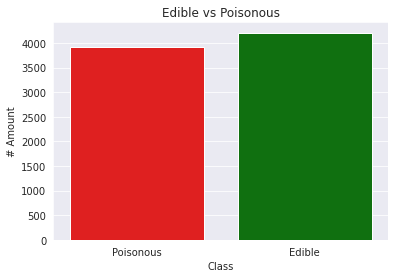

In [5]:
sns.set_style('darkgrid')
plt.figure()
fig1 = sns.countplot(dft['class'], alpha=1, palette= ['red','green'])
plt.title('Edible vs Poisonous')
plt.ylabel('# Amount')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous', 'Edible'])
plt.show()


In [6]:
_class = dft['class'] # แยกคลาสออกจาก features
df = dft.drop('class', axis=1) # เอาคอลัมน์ออก เหลือแต่ class
df = df.replace(np.nan, regex=True) # นำข้อมูล value ที่ว่างออกเพื่อให้ชัวต่อการนำไปใช้งาน


In [7]:
def feature_plot(col: Optional[str] = None) -> Any:
    """
    count feature
    :param
        - col
    """
    sns.set_style('white')
    plt.figure()
    sns.countplot(df[col], alpha=1)
    plt.ylabel('# Amount')
    plt.title(f'Mushroom {col}')
    plt.xlabel(f'Type of {col}')
    plt.show() 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


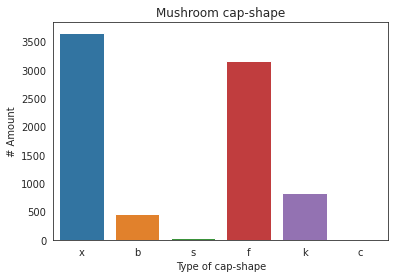

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


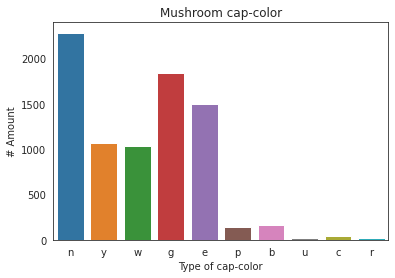

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


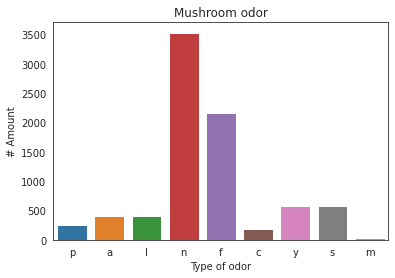

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


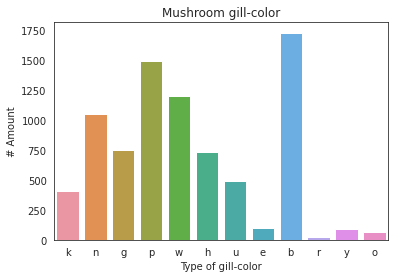

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


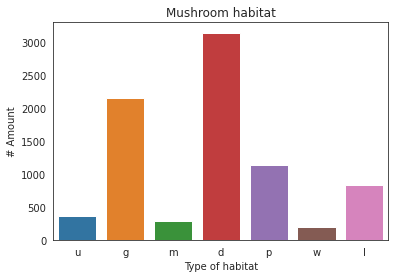

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


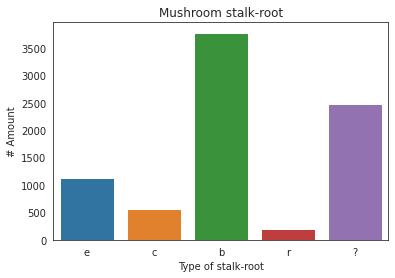

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


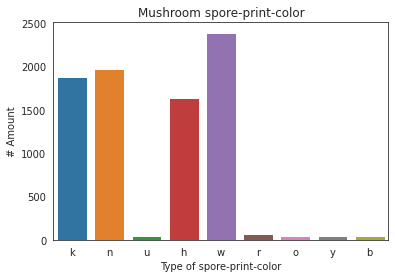

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


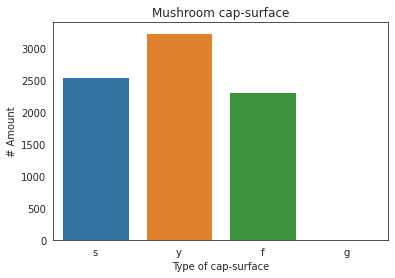

In [8]:
feature_plot('cap-shape') # รูปทรงหมวด
feature_plot('cap-color') # สีหมวก
feature_plot('odor') # กลิ่น
feature_plot('gill-color') # สีเหงือก อยู่ใต้หมวก
feature_plot('habitat') # ที่อยู่อาศัย
feature_plot('stalk-root') # ก้านราก
feature_plot('spore-print-color') # สีพิมพ์สปอร์
feature_plot('cap-surface') # พื้นผิว


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


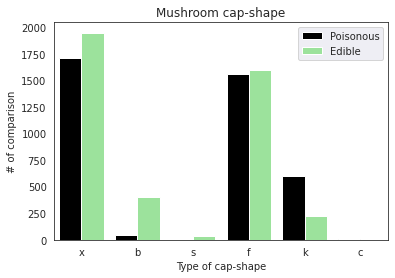

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


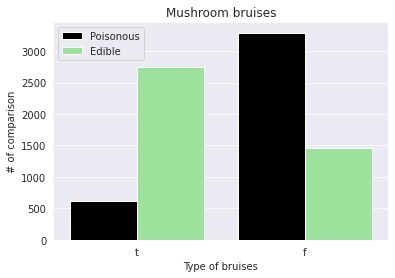

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


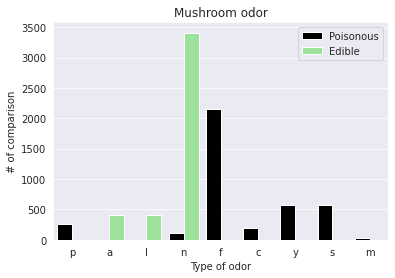

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


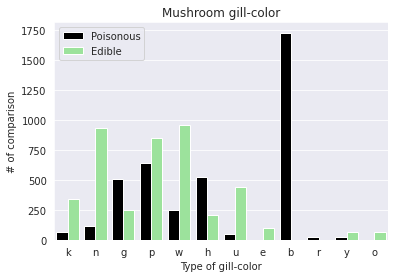

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


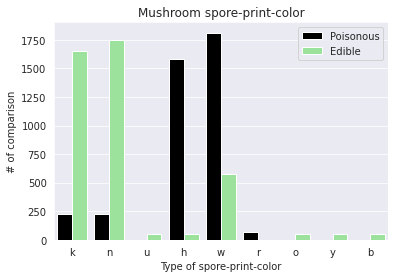

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


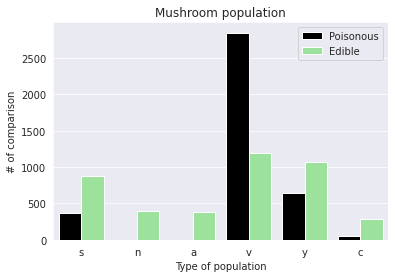

In [9]:
def feature_class_plot(col: Optional[str] = None) -> Any:
    """
    creating function to create countplots for features stacked with class
    เปรียบเทียบของแต่ละคุณลักษณะ ว่ามีกลุ่มเป้าหมายมากน้อยแค่ไหน
    
    :param
        - col
    """
    
    fig, ax = plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col, hue=_class, palette=['black', 'lightgreen'], data=df)
    plt.ylabel('# of comparison')
    plt.xlabel('Type of {}'.format(col))
    plt.title('Mushroom {}'.format(col))
    plt.legend(title=None, labels=['Poisonous', 'Edible'])
    plt.show()
    
feature_class_plot('cap-shape') # plot เปรียบเทียบ feature ระหว่าง poisonous, และ edible
feature_class_plot('bruises') # plot เปรียบเทียบ feature ระหว่าง poisonous, และ edible
feature_class_plot('odor') # plot เปรียบเทียบ feature ระหว่าง poisonous, และ edible
feature_class_plot('gill-color') # plot เปรียบเทียบ feature ระหว่าง poisonous, และ edible
feature_class_plot('spore-print-color') # plot เปรียบเทียบ feature ระหว่าง poisonous, และ edible
feature_class_plot('population') # plot เปรียบเทียบ feature ระหว่าง poisonous, และ edible


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


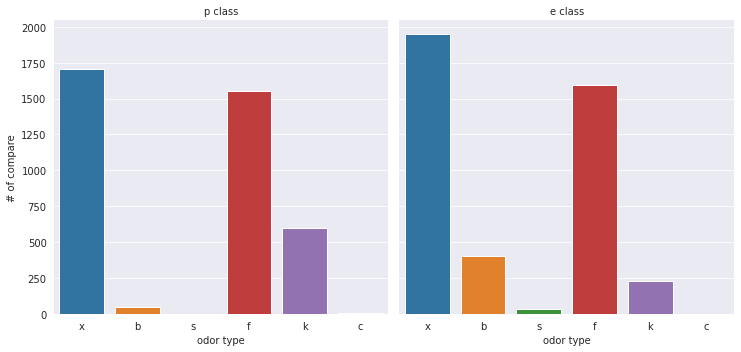

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


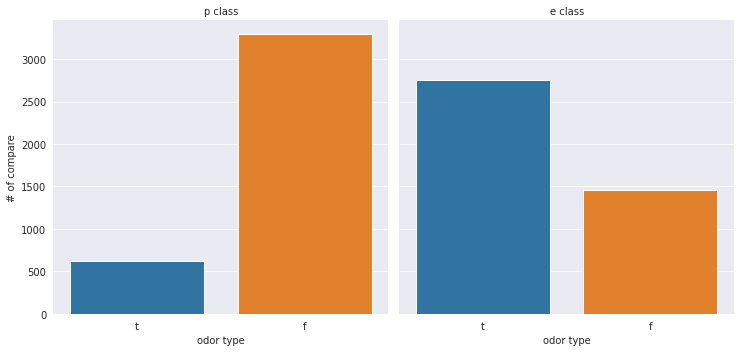

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


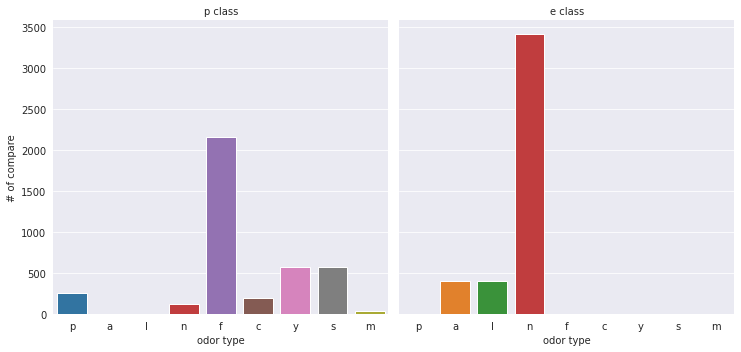

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


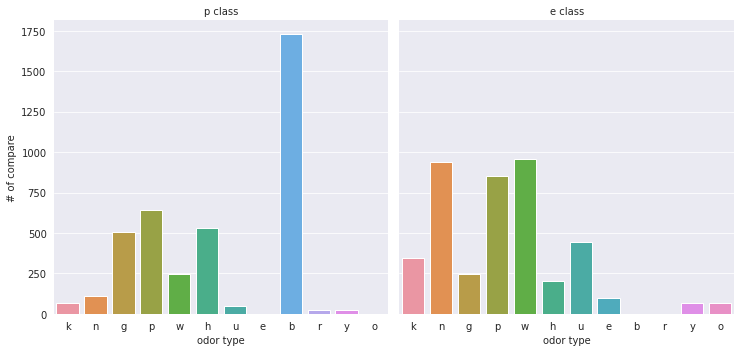

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


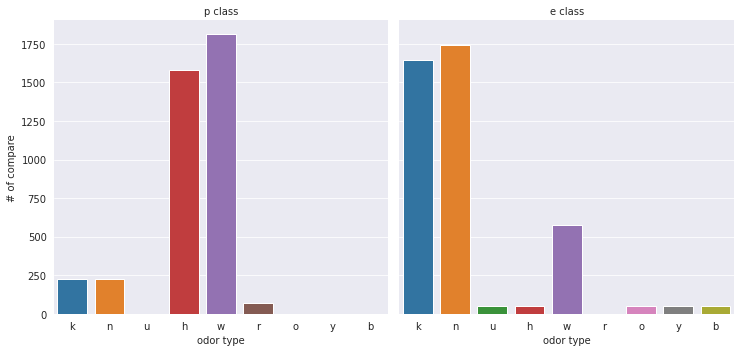

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


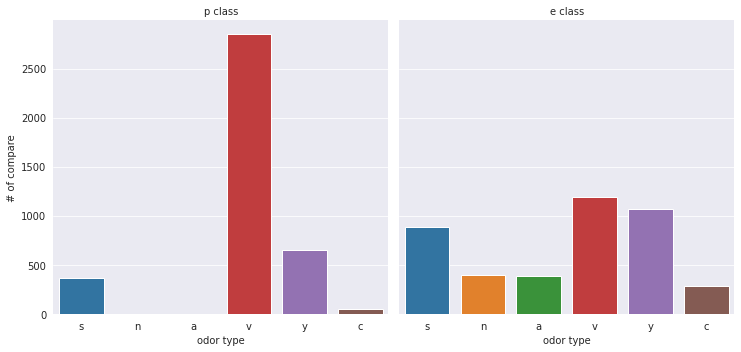

In [10]:
def compare_feature_class(col: str) -> Any:
    compare = sns.catplot(col, col='class', data=dft, kind='count', col_wrap=4)
    compare.set_axis_labels("odor type", "# of compare")
    compare.set_titles("{col_name} {col_var}")
    compare.despine(left=True) 
    plt.show()
    
compare_feature_class('cap-shape') # plot เปรียบเทียบอีกรูปแบบหนึ่งซึ่งจะแบ่งกราฟออกเป็นสองส่วนอย่างชัดเจน
compare_feature_class('bruises')
compare_feature_class('odor')
compare_feature_class('gill-color')
compare_feature_class('spore-print-color')
compare_feature_class('population')



In [11]:
dfx = dft.reset_index()[['cap-shape', 'odor', 'bruises', 'gill-color', 'spore-print-color', 'population']] # ทำการแยก feature ออกจาก dataframe หลัก
dfx = dfx.astype('category') # แปลง type ให้เป็น category ให้ง่ายต่อการนำไปแยกทำ dummy_clf
dfx.info() # แสดง type ออกมาดูจะเห็นได้ว่าเปลี่ยนเป็น category แล้ว



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cap-shape          8124 non-null   category
 1   odor               8124 non-null   category
 2   bruises            8124 non-null   category
 3   gill-color         8124 non-null   category
 4   spore-print-color  8124 non-null   category
 5   population         8124 non-null   category
dtypes: category(6)
memory usage: 49.4 KB


In [12]:
dfx = dfx.merge(_class, left_index=True, right_index=True) # ทำการ merge class หรือ target เข้ารวม dataframe ที่จะนำไปทำ dummy_clf
display(dfx.info())
dfx.head() # แสดง type ออกมาดูจะเห็นได้ว่ามีคลาสที่ยังเป็น object เพื่อแยกว่าอันไหน feature อันนไหน class


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cap-shape          8124 non-null   category
 1   odor               8124 non-null   category
 2   bruises            8124 non-null   category
 3   gill-color         8124 non-null   category
 4   spore-print-color  8124 non-null   category
 5   population         8124 non-null   category
 6   class              8124 non-null   object  
dtypes: category(6), object(1)
memory usage: 112.9+ KB


None

,cap-shape,odor,bruises,gill-color,spore-print-color,population,class
0,x,p,t,k,k,s,p
1,x,a,t,k,n,n,e
2,b,l,t,n,n,n,e
3,x,p,t,n,k,s,p
4,x,n,f,k,n,a,e


In [13]:
cat_df = dfx.select_dtypes(include=['category']).columns.to_list() # ทำการเข้าขั้นตอน dummy_clf เราจะนำ type category แยกออกมาทำ dummy_clf เพื่อแยก feature ออกจากกัน
one_hot_df = pd.get_dummies(dfx, columns=cat_df) # ซึ่งเราจะสังเกตได้ว่าในหนึ่ง feature แตกตัวออกจากกัน
one_hot_df


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,bruises_f,bruises_t,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,p,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,e,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,e,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,e,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8121,e,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [14]:

class MultiColumnLabelEncoder: # ทำการสร้างคลาส ในการทำ preprocessing data

    def __init__(self, columns=None):
        """

        :param columns:
        """
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        """

        :param X:
        :param y:
        :return:
        """
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        """

        :param X:
        :return:
        """
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
          output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        """

        :param X:
        :param y:
        :return:
        """
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        """

        :param X:
        :return:
        """
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output


In [15]:
multi = MultiColumnLabelEncoder(columns=['class']) # บอกตำแหน่งที่จะ preprocess
df = multi.fit_transform(one_hot_df) # ทำการ preprocess label encoder จาก text เป็นตัวเลข
display(set(df['class'])) # จะเห็นได้ว่า p, e แปลงเป็น 0,1 แล้ว
df # มาดูสรุปตารางจะเห็นได้ว่าข้อมูลพร้อมนำเข้า model แล้ว


{0, 1}

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,bruises_f,bruises_t,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8121,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [16]:
y = df['class'] # แยก class ออกนำไปใส่ตัวแปล y
X = df.drop(['class'],axis=1) # แยก feature ออกนำไปใส่ X


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5) # ทำการ split data ออกจากกัน เพื่อแยกว่าอันไหนเทรนอันไหนเทส


In [18]:
logreg = LogisticRegression() # เราจะใช้ model ที่มีชื่อว่า LogisticRegression
logreg.fit(X_train,y_train) # ทำการ train data


LogisticRegression()

In [19]:
prediction = logreg.predict(X_test) # เก็บค่า prediction ไว้ในตัวแปล prediction
acc = metrics.accuracy_score(y_test, prediction) # สร้างตัวแปลเพื่อดูค่า accuracy score
report = metrics.classification_report(y_test, prediction) # สร้าง report สรุปการ prediction ออกมาดู
print(report)
acc # ซึ่งเราจะเห็นได้ว่า model เรามีความถูกต้องถึง 99.3 % เลยทีเดียว ถือว่าใช้งาน

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       827
           1       1.00      0.99      0.99       798

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



0.9938461538461538

In [20]:
# กรณีต้องการ turning machine หรือ turn model เพิ่ม ให้ทำตามขั้นตอนนี้เพื่อหาค่า hyper parameter
scaler = StandardScaler()
X = scaler.fit_transform(df.values[:, 1:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5) # ทำการ split data ออกจากกัน เพื่อแยกว่าอันไหนเทรนอันไหนเทส
penalty = ['l2']
c_range = [0.001, 0.01, 0.1, 1]
solver = ['lbfgs']
parameters_lr = dict(C=c_range, penalty=penalty, solver=solver)
lr_1 = GridSearchCV(logreg,parameters_lr,scoring='accuracy', cv=3,verbose=1)





In [21]:
lr_1.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [22]:
def best_model(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)

best_model(lr_1)

0.9959994790204164
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=1)


In [23]:

y_pred_lr_1 = lr_1.best_estimator_.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_lr_1)
report = metrics.classification_report(y_test, y_pred_lr_1)
display(lr_1.best_estimator_) # print ดูค่า hyper parameters ที่เราได้จากการ turning machine
display(y_pred_lr_1)
print(report) # จะเห็นได้ว่าระหว่าง turn model กับไม่ได้มีการ turn model จะมีค่า accuracy ที่เพิ่มขึ้นมา ซึ่งช่วยให้ model เรามีความแม่นยำมาขึ้นนั้นเอง
acc # 99.5 % ดีกว่าเดิม
# จริงๆสามารถทำ A/B Testing model ตัวอื่นได้นะพวก KNN, Decision Tree เป็นต้น ค่าจะไม่ต่างกันมากเท่าไหร่

LogisticRegression(C=1)

array([1, 1, 1, ..., 1, 1, 1])

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       827
           1       1.00      0.99      0.99       798

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



0.9950769230769231